In [23]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb

warnings.filterwarnings("ignore")


read the data

In [2]:
df=pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


anlayze the data

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

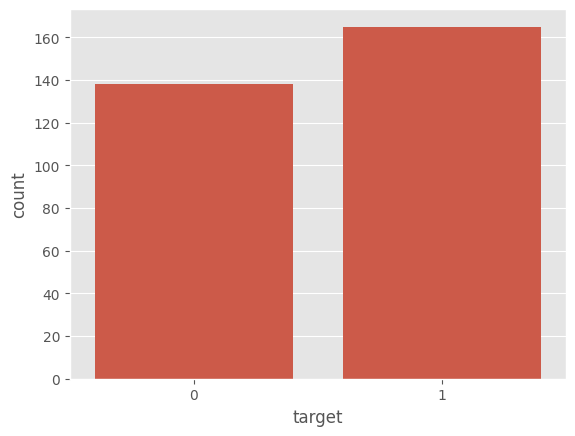

In [6]:
style.use("ggplot")
sns.countplot(x="target",data=df)

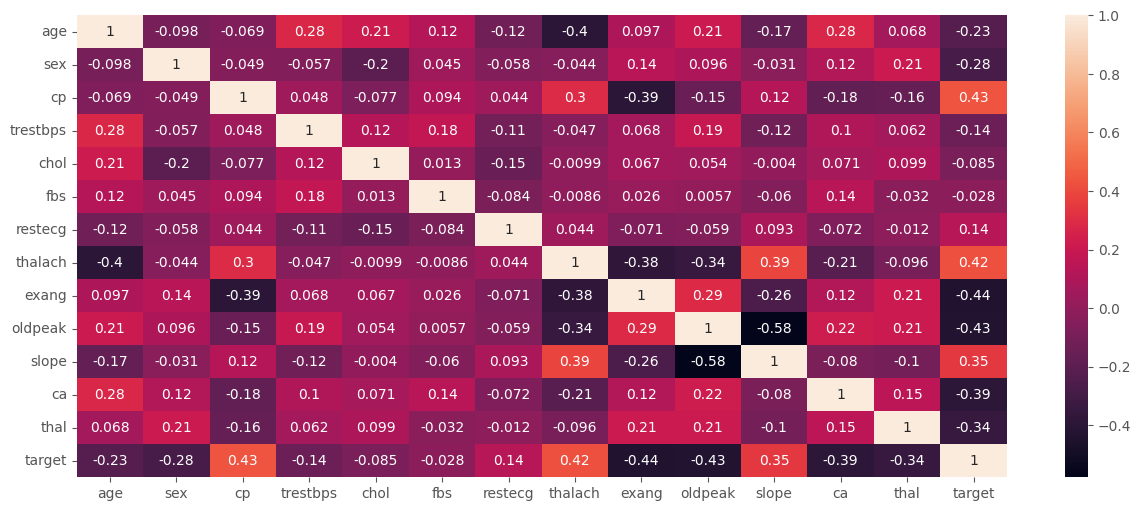

In [7]:

#identify the relation between the every columns
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

divide the target and fetures

In [8]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(x.head())
print("----------------------")
print(y.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
----------------------
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


split the train and test data

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


# Logastic Regression Model

In [10]:
logstic_model=LogisticRegression()
logstic_model.fit(x_train,y_train)
log_pred=logstic_model.predict(x_test)
accuracy_log=accuracy_score(log_pred,y_test)
print("accuarcy score logastic regression model:",accuracy_log)
r2_log=r2_score(y_test,log_pred)
print("r2 score og logatic regression :",r2_log)

accuarcy score logastic regression model: 0.8852459016393442
r2 score og logatic regression : 0.5398706896551724


draw thw confusion matrix

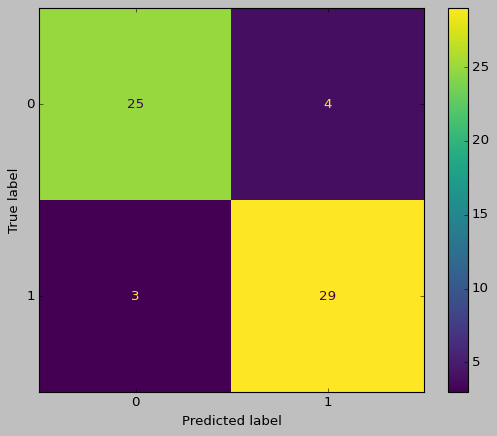

In [11]:
style.use("classic")
cm=confusion_matrix(y_test,log_pred,labels=logstic_model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logstic_model.classes_)
disp.plot()
plt.show()

In [12]:
a=classification_report(y_test,log_pred)
print(a)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Dicision tree


In [13]:
decsion_tree=DecisionTreeClassifier()
decsion_tree.fit(x_train,y_train)
decsion_tree_pred=decsion_tree.predict(x_test)
accuracy_t_tree=accuracy_score(decsion_tree_pred,y_test)
r2_t_tree=r2_score(y_test,decsion_tree_pred)
print("accuracy_score of decision tree ",accuracy_t_tree,"\n r2 score of decsion tree ",r2_t_tree)

accuracy_score of decision tree  0.8032786885245902 
 r2 score of decsion tree  0.2112068965517242


draw thw confusion matrix

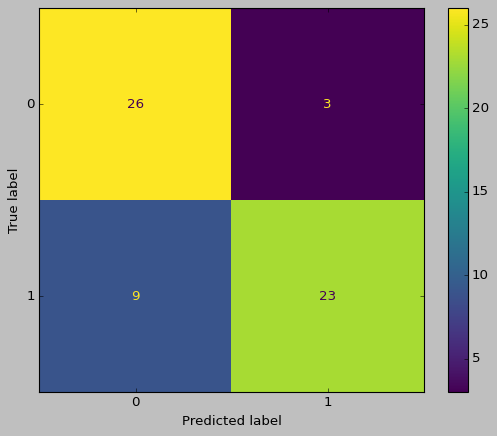

In [14]:
cm = confusion_matrix(y_test, decsion_tree_pred,labels=decsion_tree.classes_)

# Create display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=decsion_tree.classes_)
disp.plot()
plt.show()

In [15]:
a=classification_report(y_test,decsion_tree_pred)
print(a)

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



# Random forest

In [19]:
random_model=RandomForestClassifier()
random_model.fit(x_train,y_train)
random_model_pred=random_model.predict(x_test)
accuarcy_random=accuracy_score(random_model_pred,y_test)
r2_score_r_t=r2_score(y_test,random_model_pred)
print("acuuracy of the the random forest",accuarcy_random)
print("r2 score of the random forest",r2_score_r_t)

acuuracy of the the random forest 0.8360655737704918
r2 score of the random forest 0.34267241379310354


draw the confusion matrix


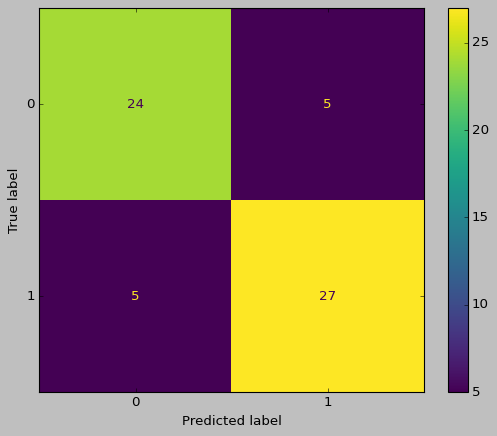

In [20]:
cm = confusion_matrix(y_test, random_model_pred,labels=random_model.classes_)

# Create display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=random_model.classes_)
disp.plot()
plt.show()



In [22]:
a=classification_report(y_test,random_model_pred)
print(a)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



# XG boost 

In [26]:
xgboost_model=xgb.XGBClassifier()
xgboost_model.fit(x_train,y_train)
xgboost_model_pred=xgboost_model.predict(x_test)
xgboost_model_pred=[i if i>0.5 else 0 for i in xgboost_model_pred ]
accuracy_xgb=accuracy_score(y_test,xgboost_model_pred)
print("accuracy of the xgboost",accuracy_xgb)

accuracy of the xgboost 0.819672131147541


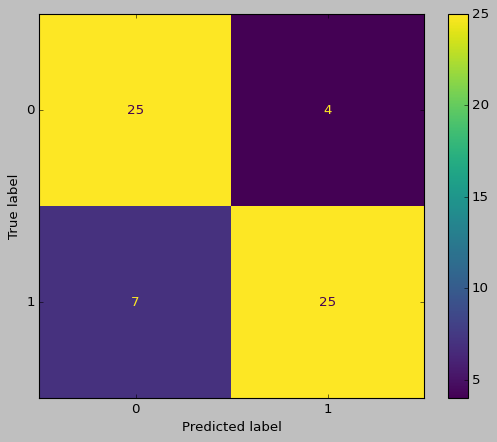

In [28]:
cm = confusion_matrix(y_test, xgboost_model_pred,labels=xgboost_model.classes_)

# Create display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgboost_model.classes_)
disp.plot()
plt.show()


draw the confusion matrix

In [27]:
a=classification_report(y_test,xgboost_model_pred)
print(a)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



# GradientBoostingClassifier

In [31]:
grd_booster_model=GradientBoostingClassifier()
grd_booster_model.fit(x_train,y_train)
grd_booster_pred=grd_booster_model.predict(x_test)
accuracy_grd_booster=accuracy_score(y_test,xgboost_model_pred)
print('sccuracy of the GradientBoostingClassifier',accuracy_grd_booster)

sccuracy of the GradientBoostingClassifier 0.819672131147541


[0, 0, 0, 0, np.int64(1), np.int64(1), 0, 0, 0, 0, np.int64(1), 0, np.int64(1), 0, np.int64(1), np.int64(1), np.int64(1), 0, 0, 0, np.int64(1), 0, np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), 0, np.int64(1), 0, 0, 0, 0, 0, 0, np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), 0, np.int64(1), np.int64(1), 0, 0, 0, 0, np.int64(1), np.int64(1), 0, 0, 0, np.int64(1), 0, 0, 0]


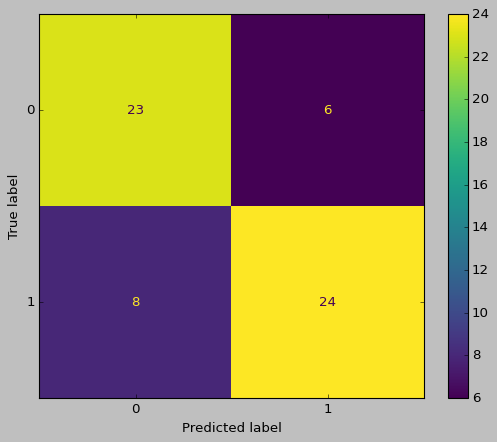

In [32]:
cm = confusion_matrix(y_test, grd_booster_pred,labels=grd_booster_model.classes_)

# Create display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grd_booster_model.classes_)
disp.plot()
plt.show()